In [1]:
import os
import sys
import numpy as np
import pandas
import matplotlib.pyplot as plt
sys.path.append('/home/kumarv/khand035/.conda/envs/gdalenv/lib/python2.7/site-packages/')
from osgeo import gdal,ogr
import glob
from PIL import Image
%matplotlib inline

In [ ]:
import skimage.feature
data_dir = '/home/kumarv/khand035/Projects/MINT/river-depth-estimation/data/BIDS2100-52/'
if os.path.isdir(data_dir + 'badmaps/')==False:
    os.mkdir(data_dir + 'badmaps/')
fnames = []
for fname in os.listdir(data_dir):
    if fname.endswith('tif')==False or fname[0]=='M' or fname[0]=='F':
        continue
    fnames.append(fname[17:48])
fnames = list(set(fnames))
fnames.sort()
#print fnames
s1bands = ['VV', 'VH', 'angle']
s2bands = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B10', 'B11', 'B12', 'QA10', 'QA20', 'QA60']
red = s2bands.index('B4')
green = s2bands.index('B3')
blue = s2bands.index('B2')
nir = s2bands.index('B8')
swir1 = s2bands.index('B11')
swir2 = s2bands.index('B12')

for i in range(0,len(fnames)):
    fname = fnames[i]
    imgs = glob.glob(data_dir + 'S1*' + fname + '*.tif')
    if len(imgs)==3:
        for j in range(0,len(imgs)):
            filename = imgs[j]
            ds = Image.open(filename)
            ds_arr = np.array(ds)
            rows,cols = ds_arr.shape
            if j==0:
                data = np.zeros((rows,cols,len(s1bands)))
            data[:,:,j] = ds_arr
        if os.path.isfile(data_dir + 'M1_' + fname + '.tif')==True:
            ds = Image.open(data_dir + 'M1_' + fname + '.tif')
            ds_arr = np.array(ds)
            ds_arr[0,0] = 0
            ds_arr[0,1] = 1
            ds_arr[0,2] = 2
            ds_arr[0,3] = 3
    #         vvimg = data[:,:,0]
    #         vvimg = vvimg - np.min(vvimg)
    #         vvimg = np.floor(vvimg*10)
    #         vvimg = vvimg.astype(int)
    #         #print [np.min(vvimg), np.max(vvimg)]
    #         #print vvimg
    #         gcor = skimage.feature.greycomatrix(vvimg,[3],[0, np.pi/4, np.pi/2, 3*np.pi/4],symmetric=True,levels=np.max(vvimg)+1)
    #         print skimage.feature.greycoprops(gcor, 'dissimilarity')
            f, (ax1, ax2, ax3) = plt.subplots(1,3, sharex=True, sharey=True,figsize=(15,10))
            ax1.imshow(data[:,:,0])
            ax2.imshow(data[:,:,1])
            ax3.imshow(ds_arr,cmap=plt.get_cmap('Set1'))
            ax2.set_title(fname[0:8])
            plt.show()
            #isgood = raw_input('Checking Sentinel-1: ')
        #if isgood==0:
        #    os.system('mv ' + data_dir  + 'M1_' + fname + '.tif ' + data_dir + 'badmaps/')
        
        
        #print imgs
    imgs = glob.glob(data_dir + 'S2*' + fname + '*.tif')
    if len(imgs)>0:
        scene_arr = []
        for img in imgs:
            tname = img[img.rfind('/')+1:]
            scene_arr.append(tname[49:55])
        scene_arr = list(set(scene_arr))
        #print scene_arr
        for scene in scene_arr:
            imgs = glob.glob(data_dir + 'S2*' + fname + '*' + scene + '*.tif')
            if len(imgs)==16:
                for j in range(0,len(imgs)):
                    filename = imgs[j]
                    ds = Image.open(filename)
                    ds_arr = np.array(ds)
                    rows,cols = ds_arr.shape
                    if j==0:
                        data = np.zeros((rows,cols,len(s2bands)))
                    data[:,:,j] = ds_arr

                if os.path.isfile(data_dir + 'M2_' + fname + '_' + scene + '.tif')==True:
                    #print data_dir + 'M2_' + fname + '_' + scene + '.tif'
                    ds = Image.open(data_dir + 'M2_' + fname + '_' + scene + '.tif')
                    ds_arr = np.array(ds)
                    ds_arr[0,0] = 0
                    ds_arr[0,1] = 1
                    ds_arr[0,2] = 2
                    ds_arr[0,3] = 3

                    f, (ax1, ax2, ax3) = plt.subplots(1,3, sharex=True, sharey=True,figsize=(15,10))
                    img_data = data[:,:,[red, green, blue]]
                    img_data = (img_data - np.min(img_data))/np.max(img_data)
                    ax1.imshow(img_data)
                    img_data = data[:,:,[swir2, swir1, nir]]
                    img_data = (img_data - np.min(img_data))/np.max(img_data)
                    ax3.imshow(ds_arr,cmap=plt.get_cmap('Set1'))
                    img_data = data[:,:,[nir, red, green]]
                    img_data = (img_data - np.min(img_data))/np.max(img_data)
                    ax2.imshow(img_data)
                    ax2.set_title(fname[0:8])
            #isgood = raw_input('Checking Sentinel-2: ')
        #if isgood==0:
        #    os.system('mv ' + data_dir  + 'M1_' + fname + '.tif ' + data_dir + 'badmaps/')
   
            
        
        
    

In [ ]:
def PlotS2(search_str,data_dir):
    imgs = glob.glob(data_dir + 'S2*' + search_str + '*.tif')
    if len(imgs)==16:
        for j in range(0,len(imgs)):
            filename = imgs[j]
            ds = Image.open(filename)
            ds_arr = np.array(ds)
            rows,cols = ds_arr.shape
            if j==0:
                data = np.zeros((rows,cols,len(s2bands)))
            data[:,:,j] = ds_arr

            f, (ax1, ax2, ax3) = plt.subplots(1,3, sharex=True, sharey=True,figsize=(15,10))
            img_data = data[:,:,[red, green, blue]]
            img_data = (img_data - np.min(img_data))/np.max(img_data)
            ax1.imshow(img_data)
            img_data = data[:,:,[swir2, swir1, nir]]
            img_data = (img_data - np.min(img_data))/np.max(img_data)
            ax3.imshow(img_data)
            img_data = data[:,:,[nir, red, green]]
            img_data = (img_data - np.min(img_data))/np.max(img_data)
            ax2.imshow(img_data)
            ax2.set_title(fname[0:8])

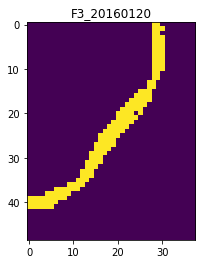

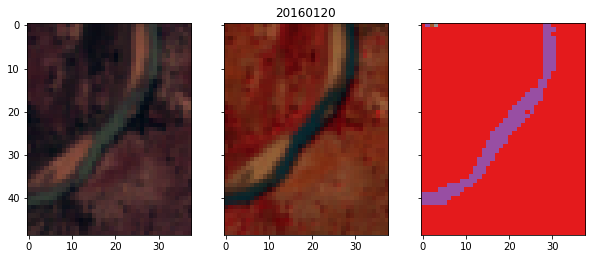

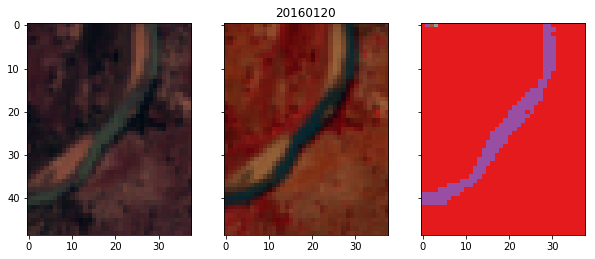

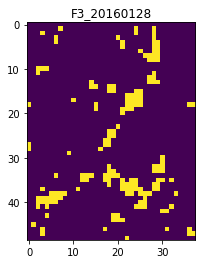

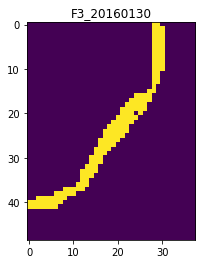

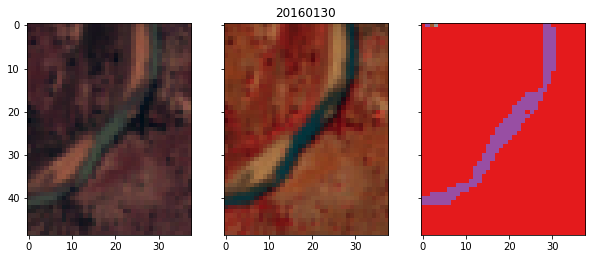

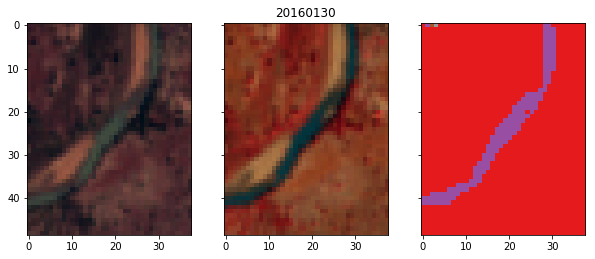

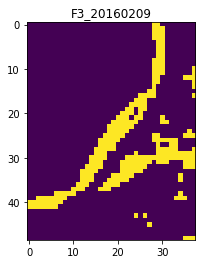

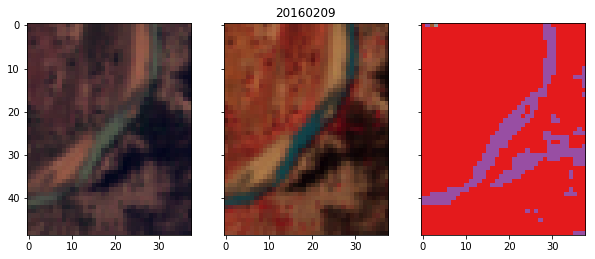

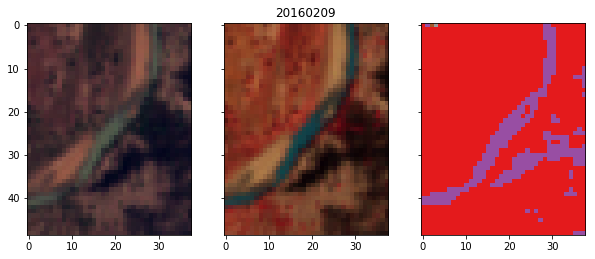

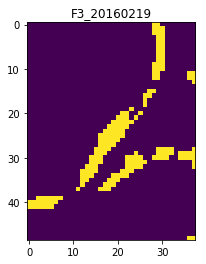

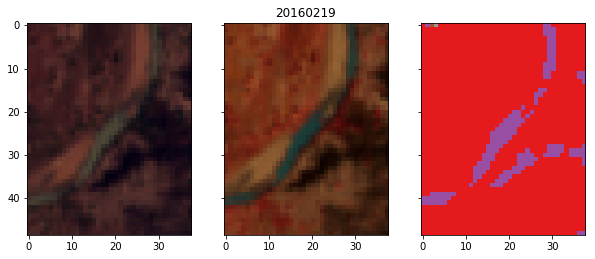

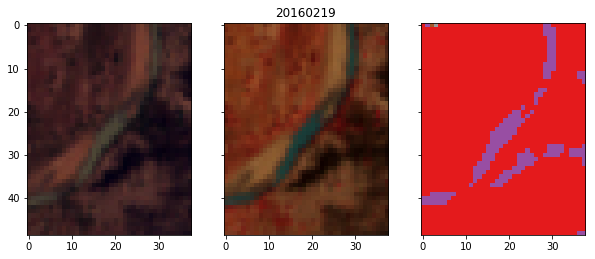

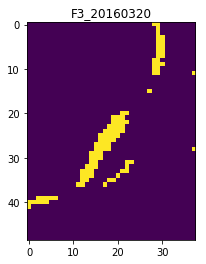

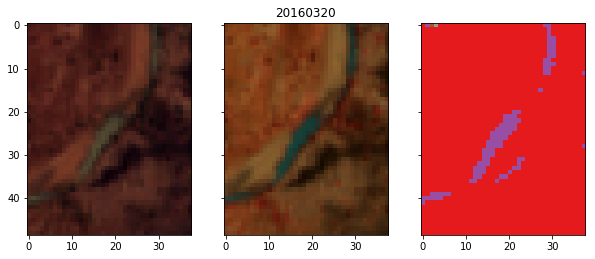

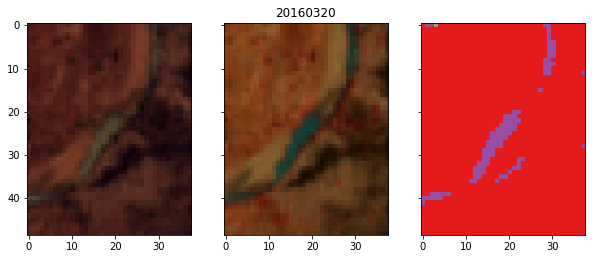

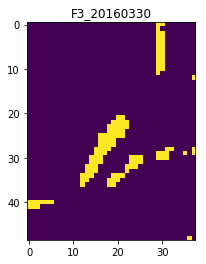

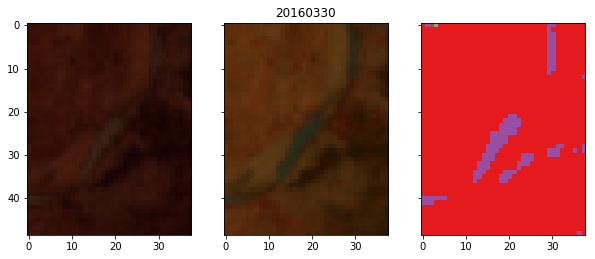

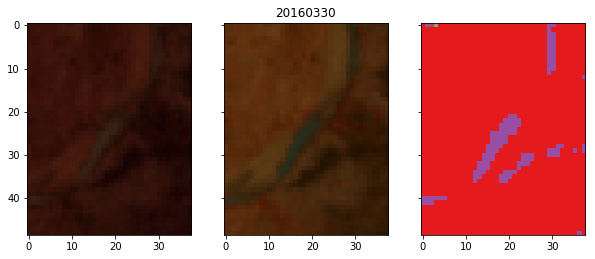

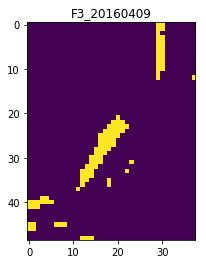

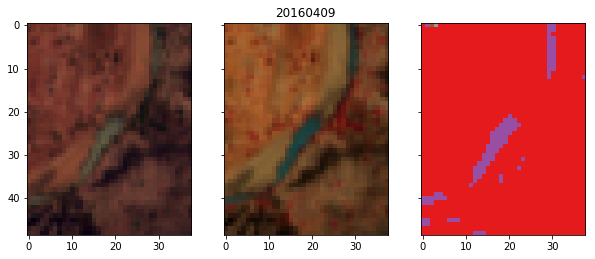

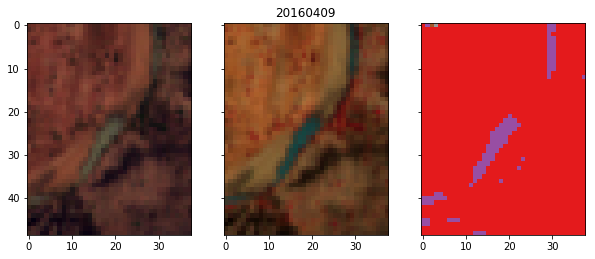

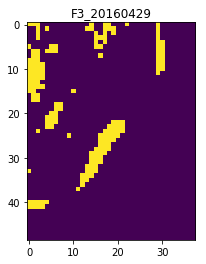

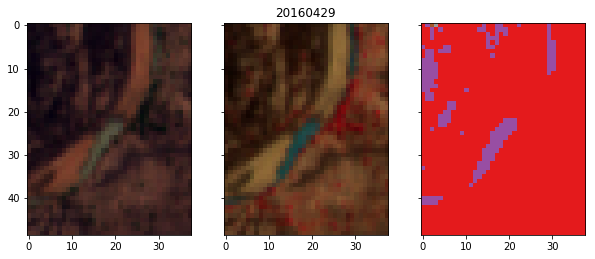

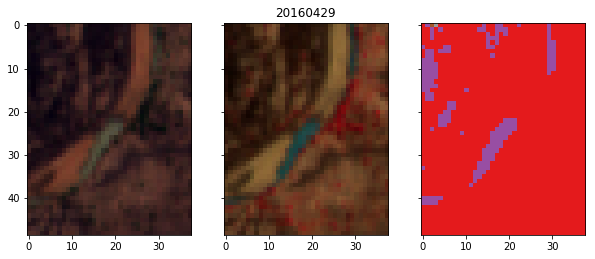

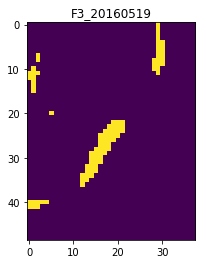

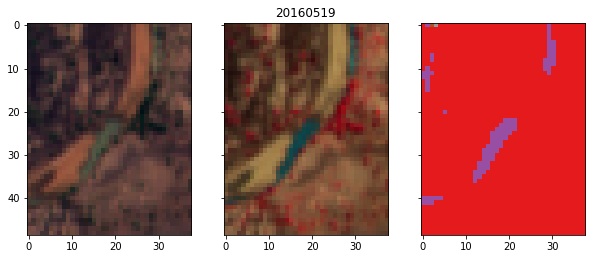

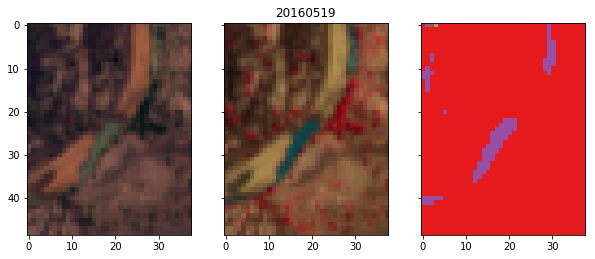

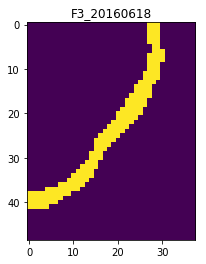

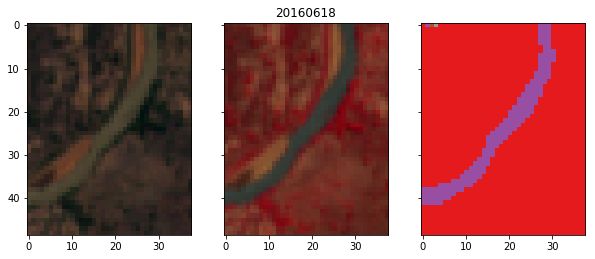

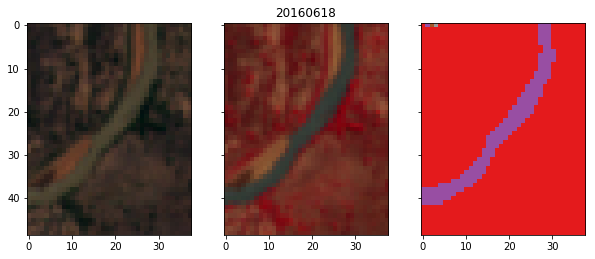

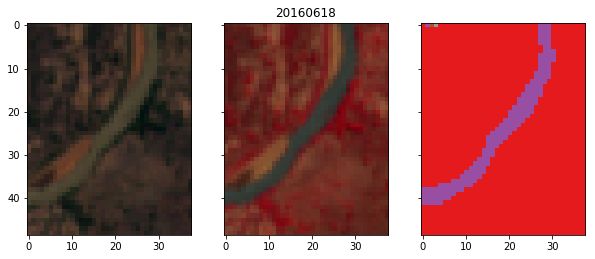

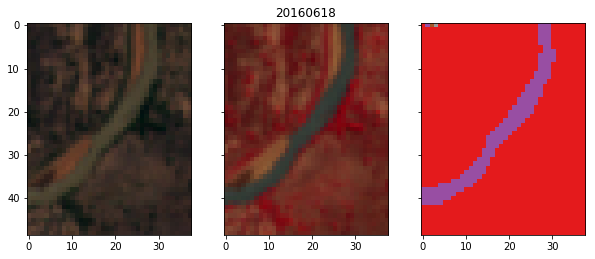

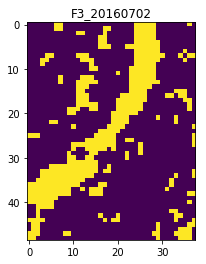

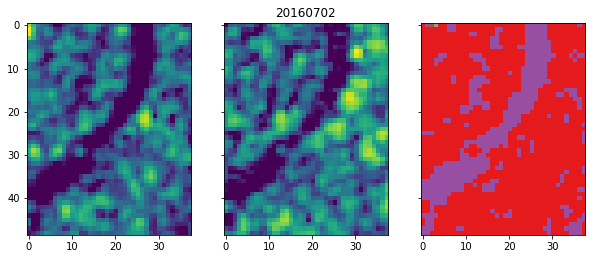

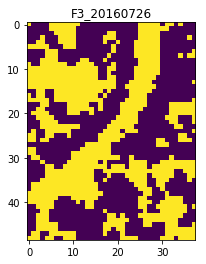

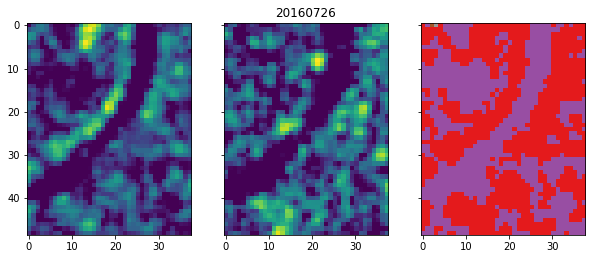

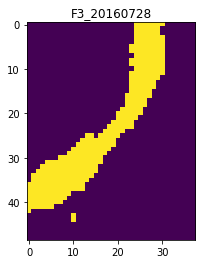

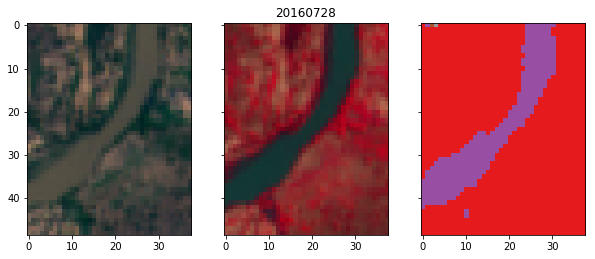

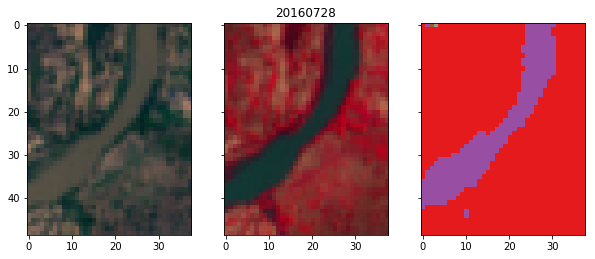

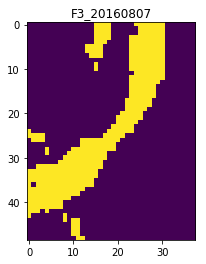

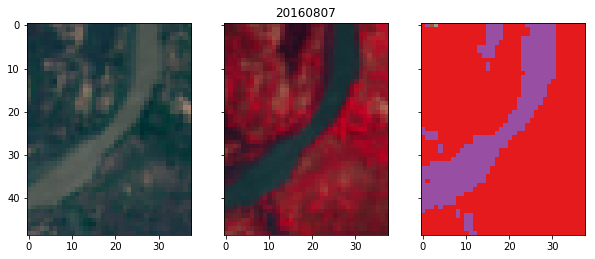

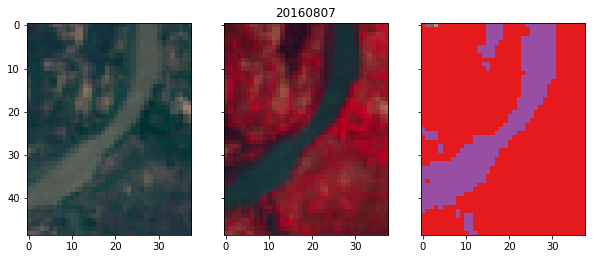

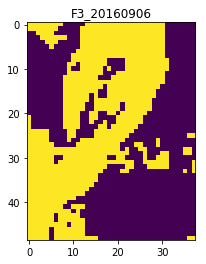

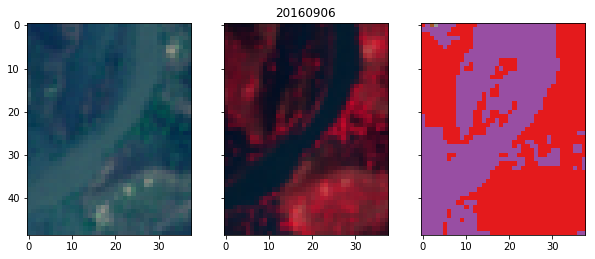

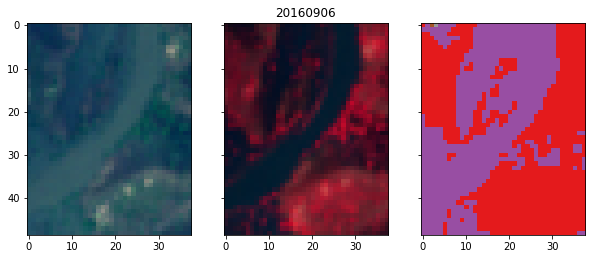

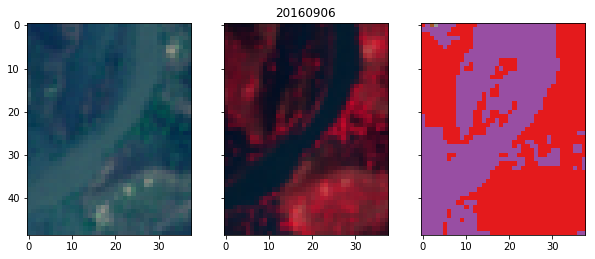

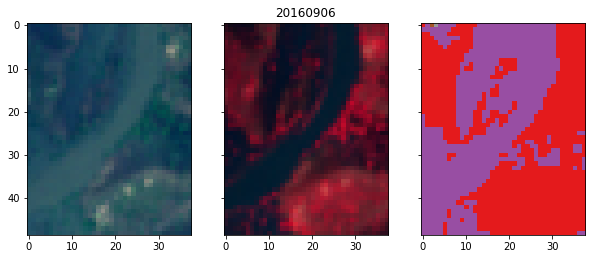

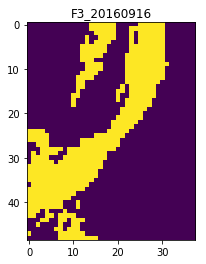

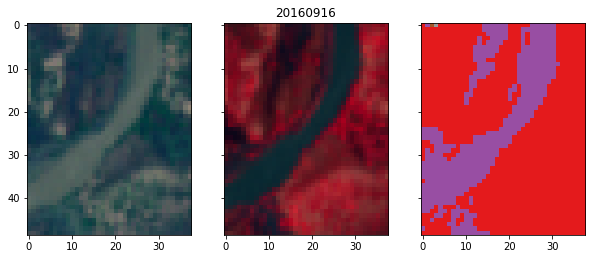

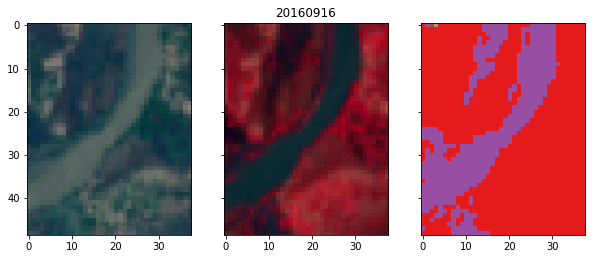

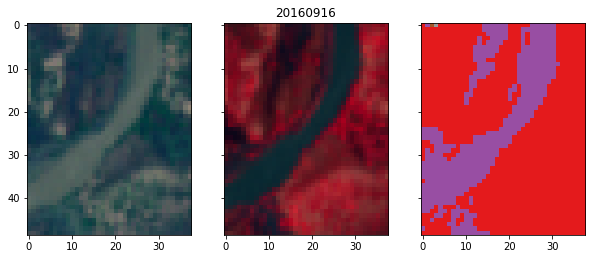

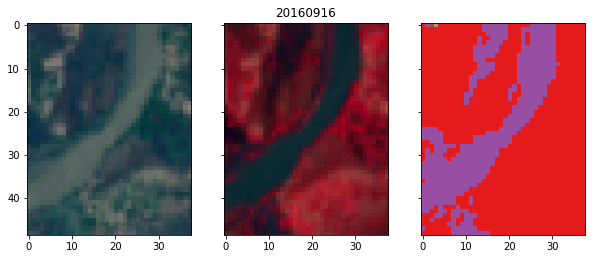

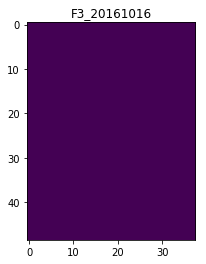

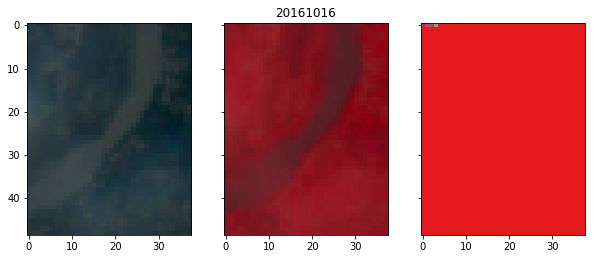

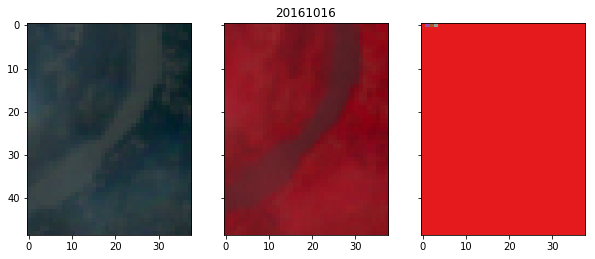

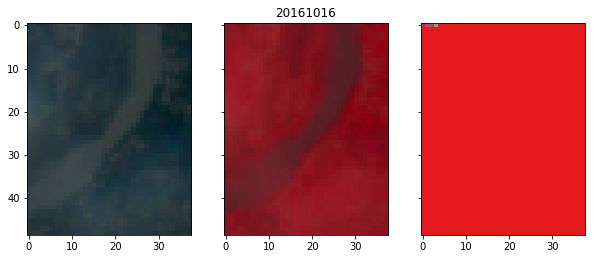

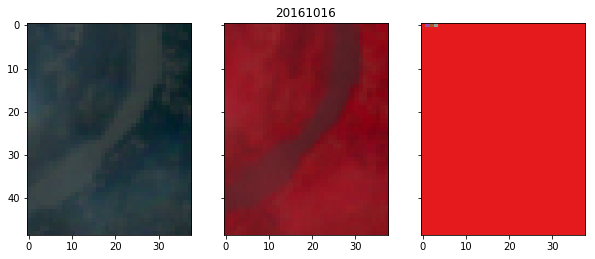

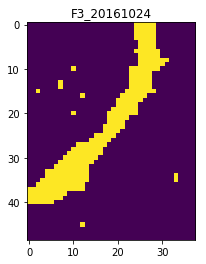

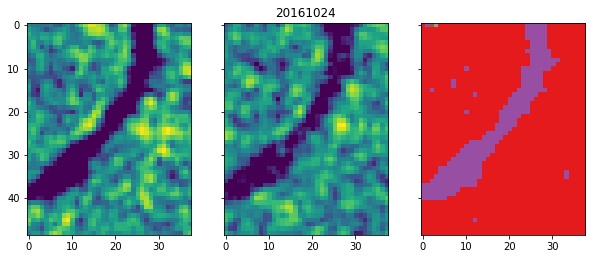

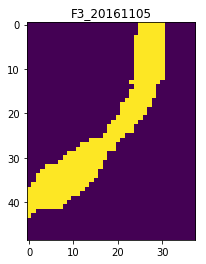

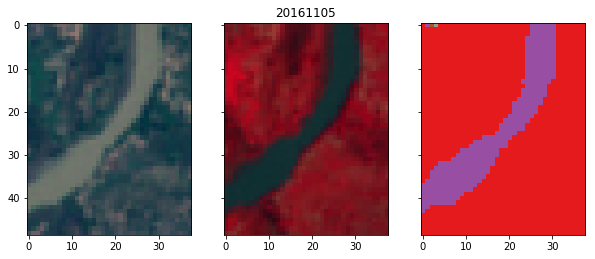

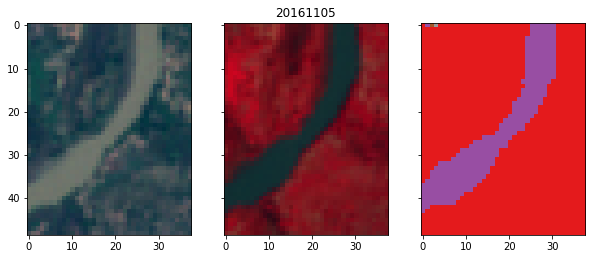

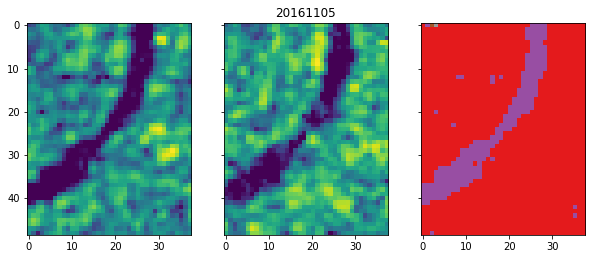

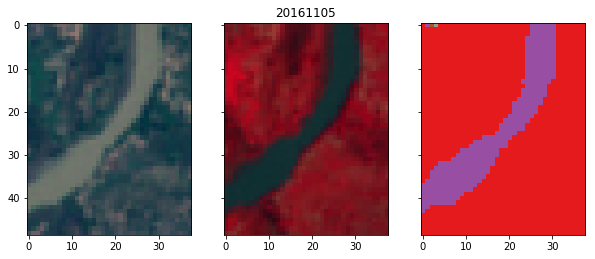

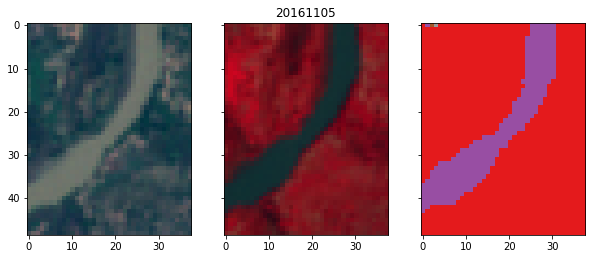

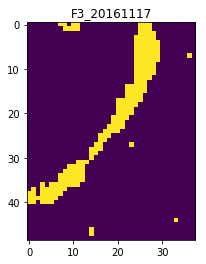

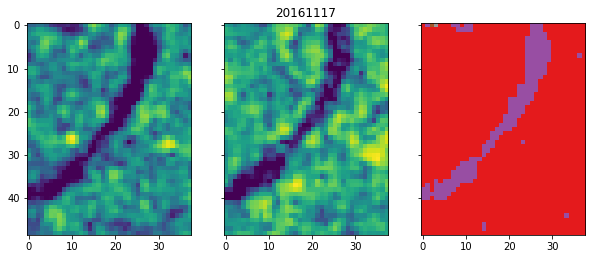

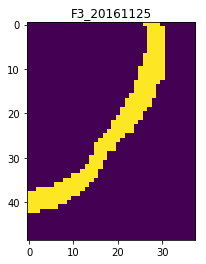

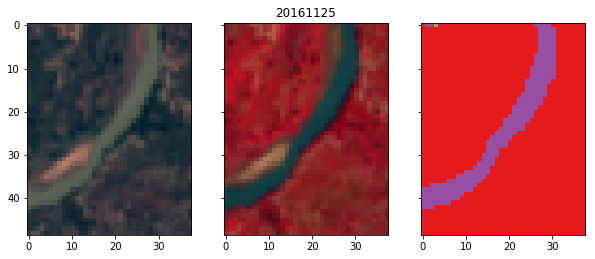

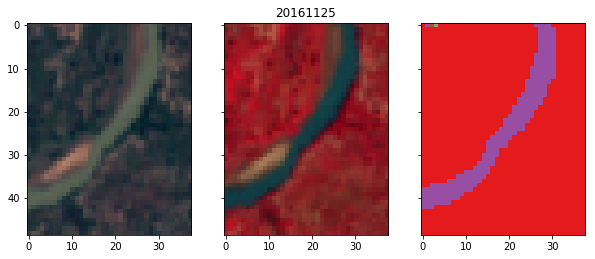

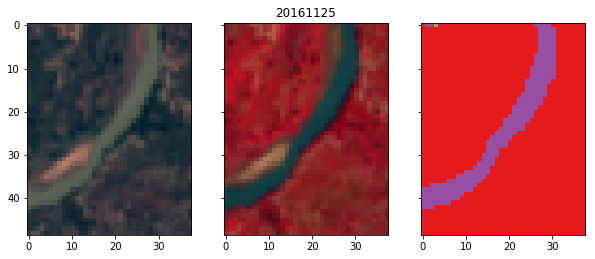

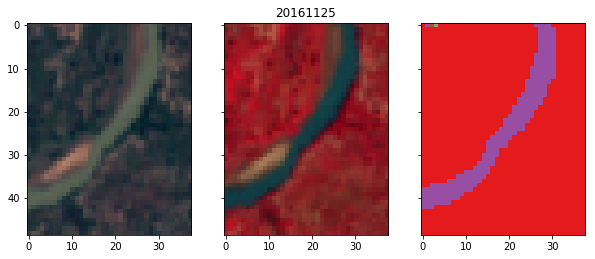

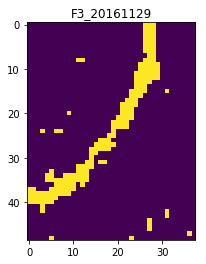

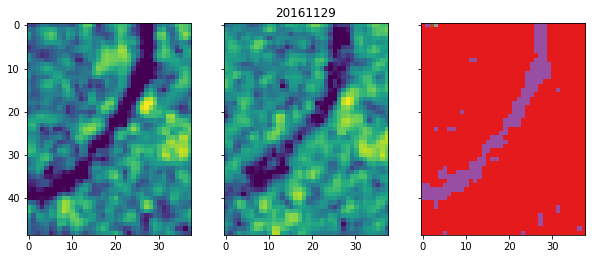

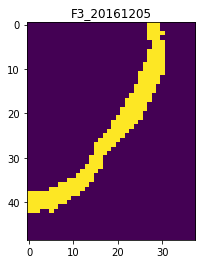

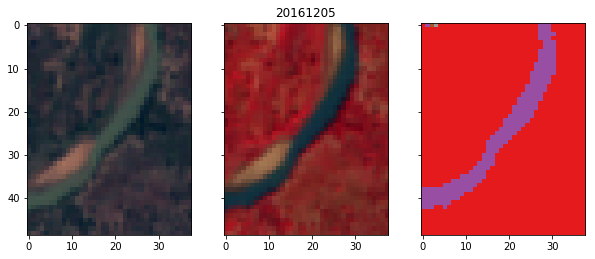

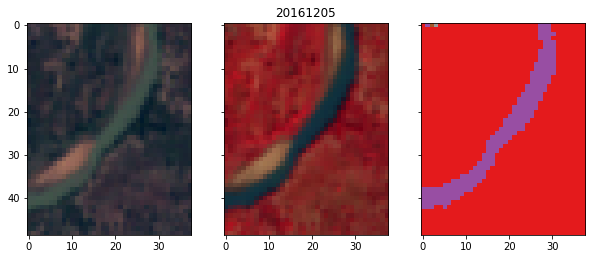

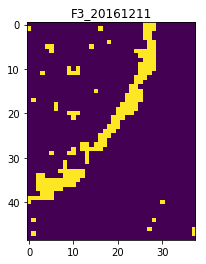

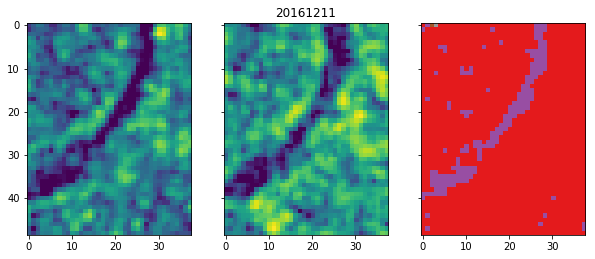

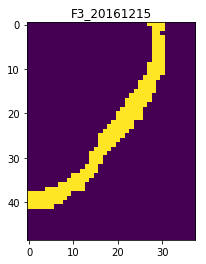

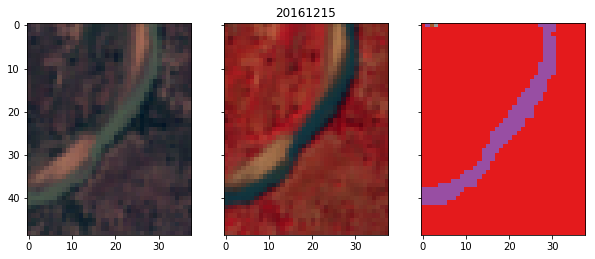

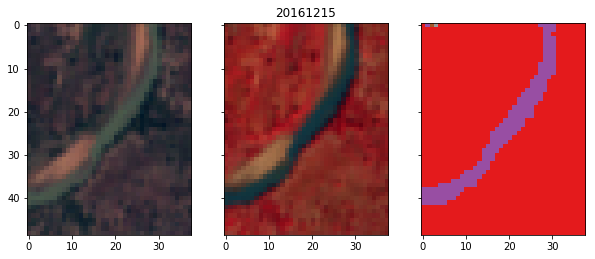

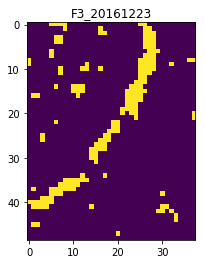

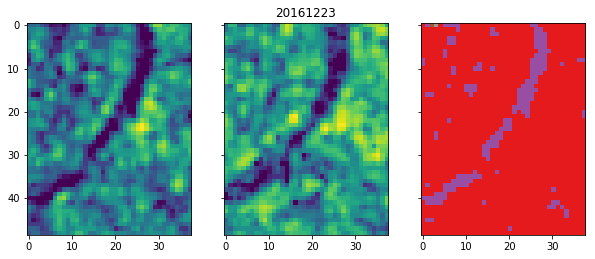

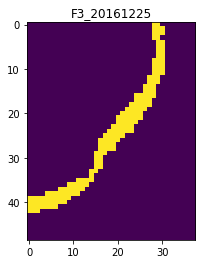

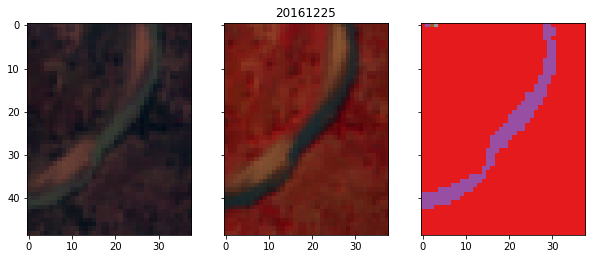

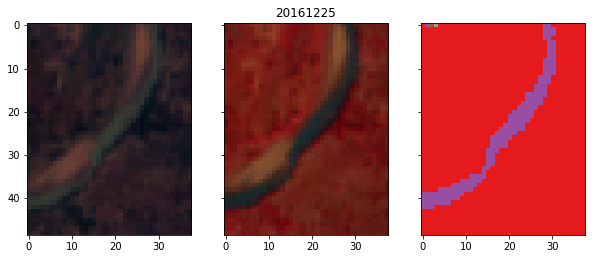

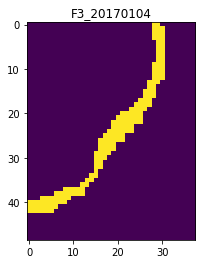

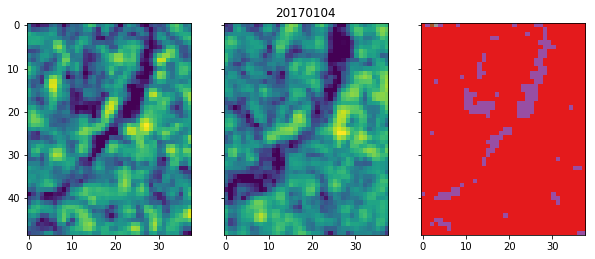

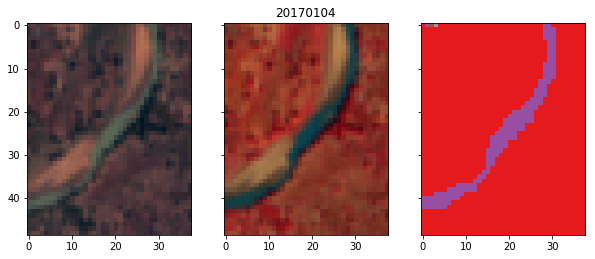

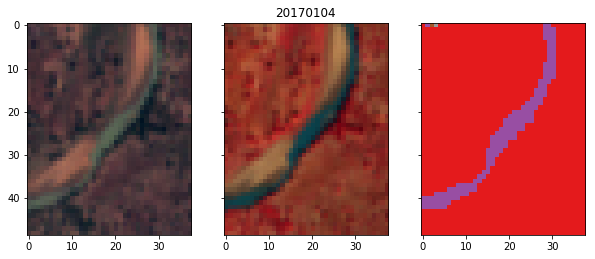

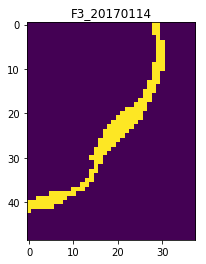

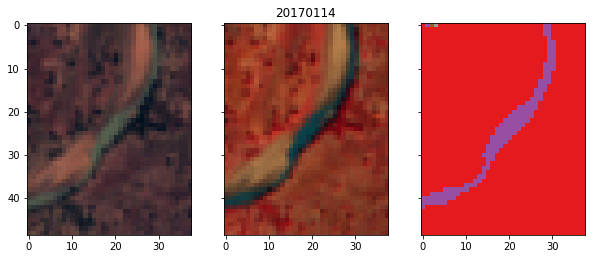

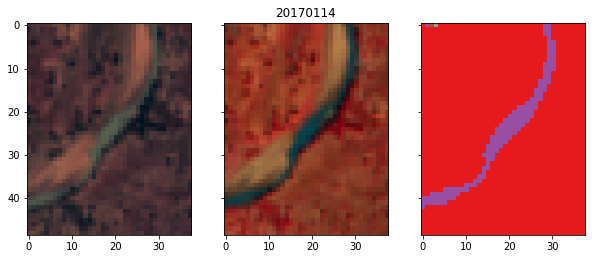

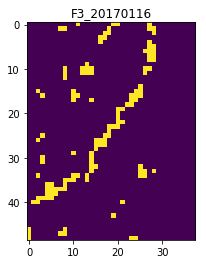

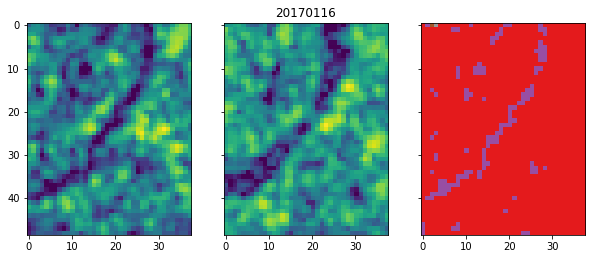

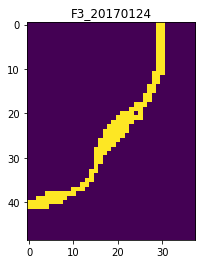

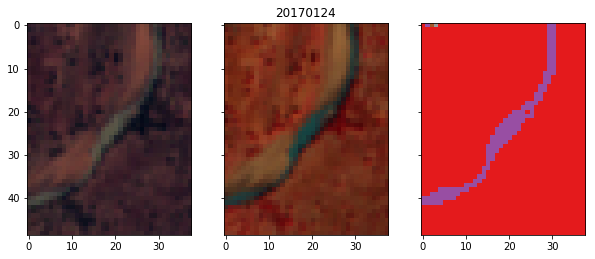

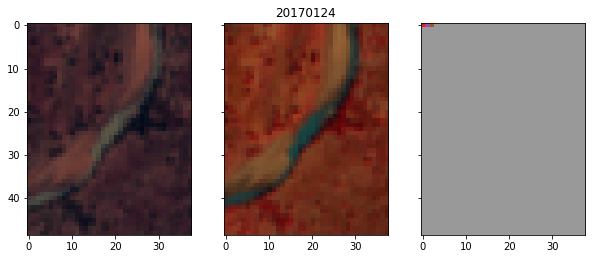

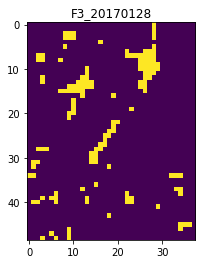

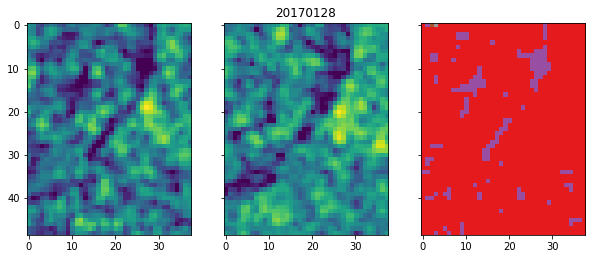

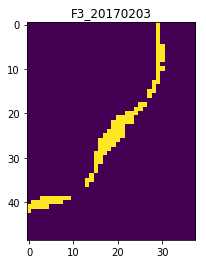

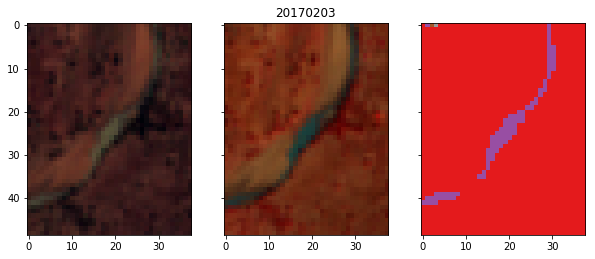

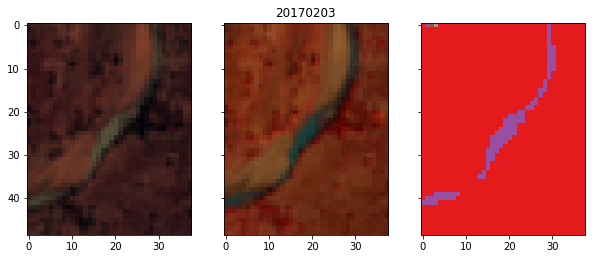

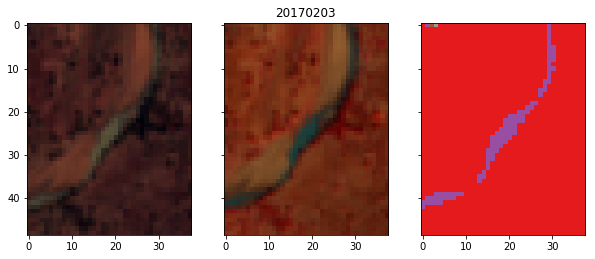

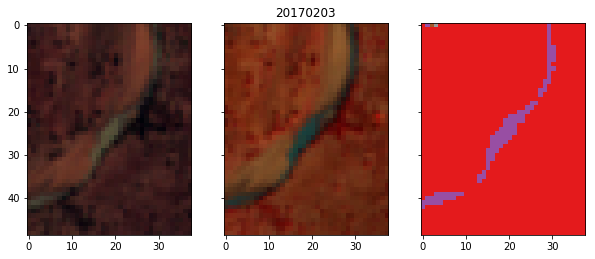

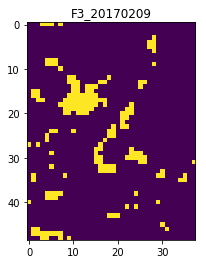

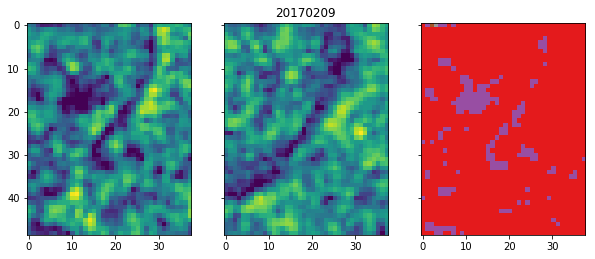

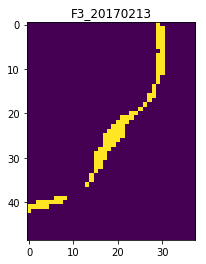

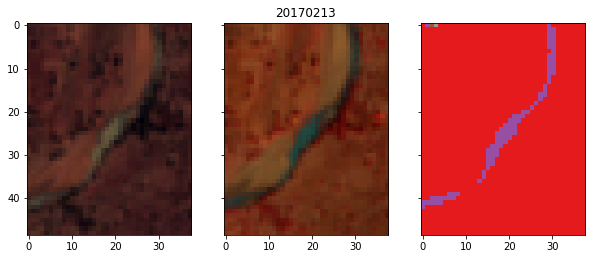

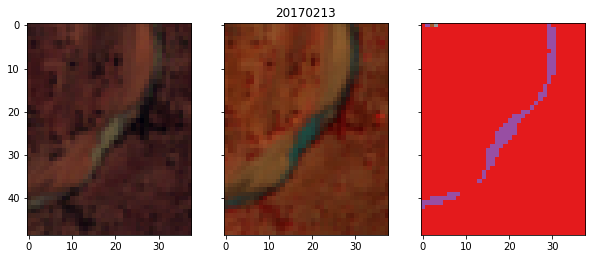

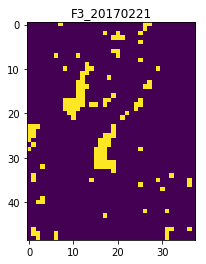

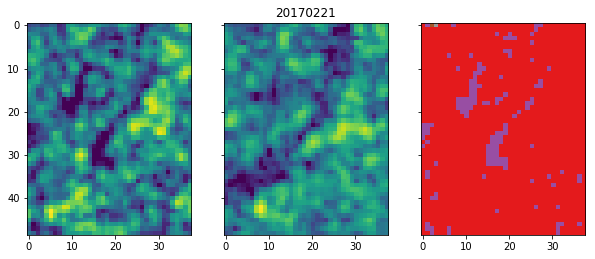

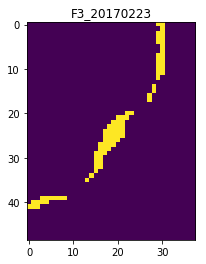

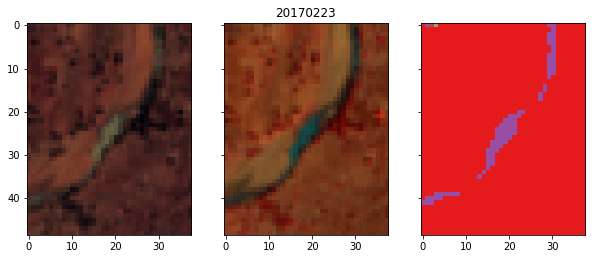

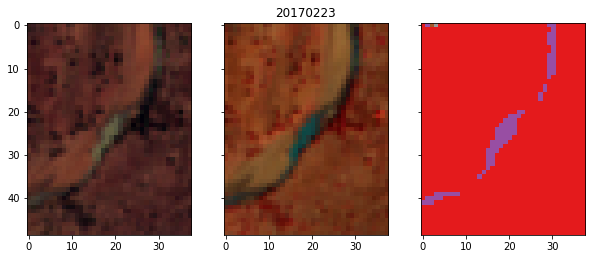

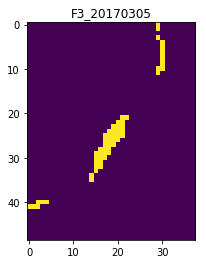

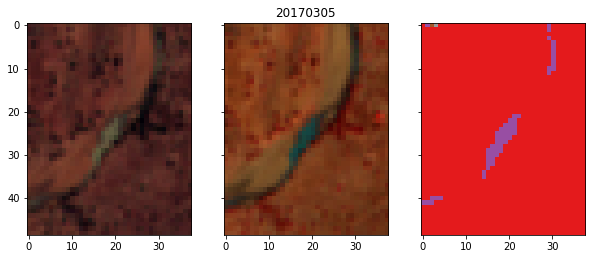

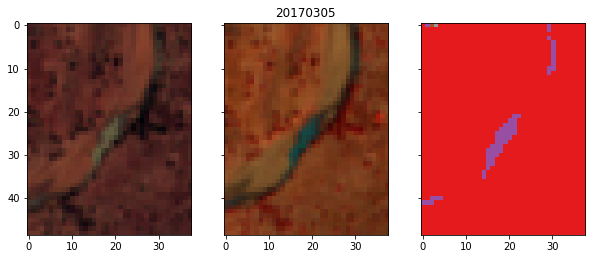

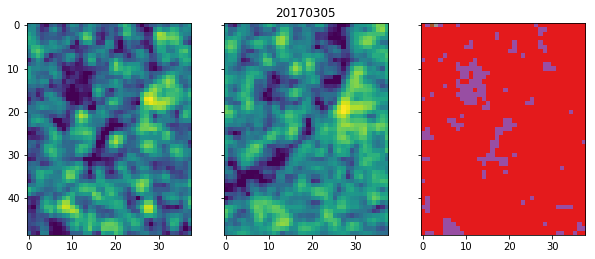

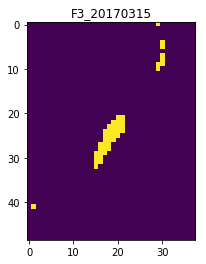

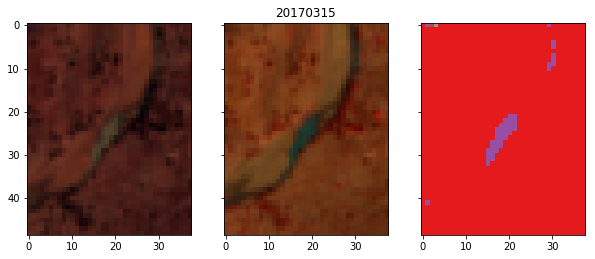

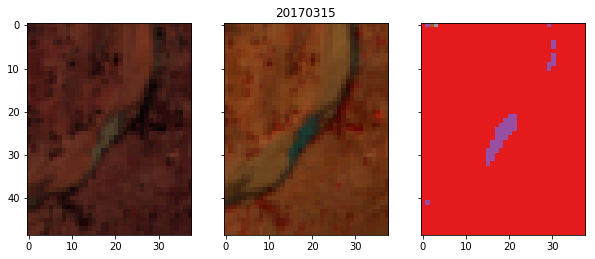

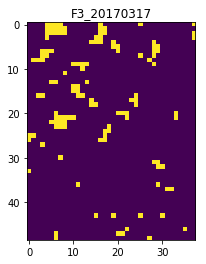

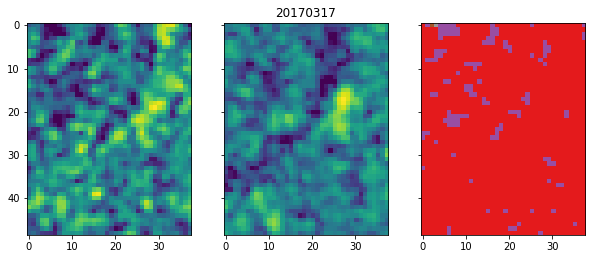

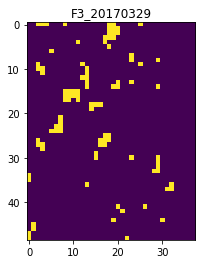

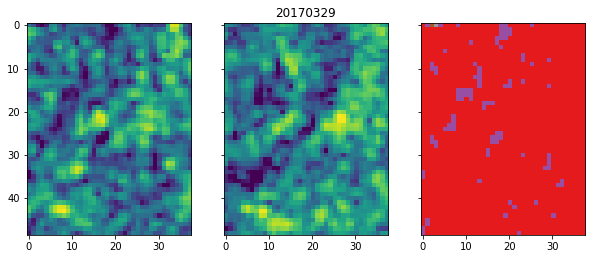

In [11]:
import skimage.feature
data_dir = '/home/kumarv/khand035/Projects/MINT/river-depth-estimation/data/BIDS2113-44/'
s1bands = ['VV', 'VH', 'angle']
s2bands = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B10', 'B11', 'B12', 'QA10', 'QA20', 'QA60']
red = s2bands.index('B4')
green = s2bands.index('B3')
blue = s2bands.index('B2')
nir = s2bands.index('B8')
swir1 = s2bands.index('B11')
swir2 = s2bands.index('B12')


mask_list = glob.glob(data_dir + 'F*.tif')
mask_list.sort()
#print mask_list

for i in range(0,len(mask_list)):
    filename = mask_list[i]
#     print filename
#     continue
    tname = filename[filename.rfind('/')+1:-4]
    ds = Image.open(filename)
    ds_arr = np.array(ds)
    plt.figure()
    plt.imshow(ds_arr)
    plt.title(tname)
    u1 = filename.find('_')
    u2 = filename.rfind('.')
    datestr = filename[u1+1:u2]
    #print datestr

    imgs = glob.glob(data_dir + 'M*' + datestr + '*.tif')
    fnames = []
    for timg in imgs:
        tname = timg[timg.rfind('/')+1:]
        fnames.append(tname[3:34])
    fnames = list(set(fnames))
    for fname in fnames:
        #print tname
    #     if len(imgs)==1:
    #         f, ax = plt.subplots(1,len(imgs), sharex=True, sharey=True,figsize=(15,10))
    #         img = imgs[0]
    #         ds = Image.open(img)
    #         ds_arr = np.array(ds)
    #         ax.imshow(ds_arr)

    #     if len(imgs)==2:
    #         f, (ax1,ax2) = plt.subplots(1,len(imgs), sharex=True, sharey=True,figsize=(15,10))
    #         img = imgs[0]
    #         ds = Image.open(img)
    #         ds_arr = np.array(ds)
    #         ax1.imshow(ds_arr)

    #         img = imgs[1]
    #         ds = Image.open(img)
    #         ds_arr = np.array(ds)
    #         ax2.imshow(ds_arr)

    #     if len(imgs)==3:
    #         f, (ax1,ax2,ax3) = plt.subplots(1,len(imgs), sharex=True, sharey=True,figsize=(15,10))
    #         img = imgs[0]
    #         ds = Image.open(img)
    #         ds_arr = np.array(ds)
    #         ax1.imshow(ds_arr)

    #         img = imgs[1]
    #         ds = Image.open(img)
    #         ds_arr = np.array(ds)
    #         ax2.imshow(ds_arr)

    #         img = imgs[2]
    #         ds = Image.open(img)
    #         ds_arr = np.array(ds)
    #         ax3.imshow(ds_arr)


        imgs = glob.glob(data_dir + 'S1*' + fname + '*.tif')
        if len(imgs)==3:
            for j in range(0,len(imgs)):
                filename = imgs[j]
                ds = Image.open(filename)
                ds_arr = np.array(ds)
                rows,cols = ds_arr.shape
                if j==0:
                    data = np.zeros((rows,cols,len(s1bands)))
                data[:,:,j] = ds_arr
            if os.path.isfile(data_dir + 'M1_' + fname + '.tif')==True:
                ds = Image.open(data_dir + 'M1_' + fname + '.tif')
                ds_arr = np.array(ds)
                ds_arr[0,0] = 0
                ds_arr[0,1] = 1
                ds_arr[0,2] = 2
                ds_arr[0,3] = 3
        #         vvimg = data[:,:,0]
        #         vvimg = vvimg - np.min(vvimg)
        #         vvimg = np.floor(vvimg*10)
        #         vvimg = vvimg.astype(int)
        #         #print [np.min(vvimg), np.max(vvimg)]
        #         #print vvimg
        #         gcor = skimage.feature.greycomatrix(vvimg,[3],[0, np.pi/4, np.pi/2, 3*np.pi/4],symmetric=True,levels=np.max(vvimg)+1)
        #         print skimage.feature.greycoprops(gcor, 'dissimilarity')
                f, (ax1, ax2, ax3) = plt.subplots(1,3, sharex=True, sharey=True,figsize=(10,5))
                ax1.imshow(data[:,:,0])
                ax2.imshow(data[:,:,1])
                ax3.imshow(ds_arr,cmap=plt.get_cmap('Set1'))
                ax2.set_title(fname[0:8])
                plt.show()
                #isgood = raw_input('Checking Sentinel-1: ')
            #if isgood==0:
            #    os.system('mv ' + data_dir  + 'M1_' + fname + '.tif ' + data_dir + 'badmaps/')


            #print imgs
        imgs = glob.glob(data_dir + 'S2*' + fname + '*.tif')
        if len(imgs)>0:
            scene_arr = []
            for img in imgs:
                tname = img[img.rfind('/')+1:]
                scene_arr.append(tname[49:55])
            scene_arr = list(set(scene_arr))
            #print scene_arr
            for scene in scene_arr:
                imgs = glob.glob(data_dir + 'S2*' + fname + '*' + scene + '*.tif')
                if len(imgs)==16:
                    for j in range(0,len(imgs)):
                        filename = imgs[j]
                        ds = Image.open(filename)
                        ds_arr = np.array(ds)
                        rows,cols = ds_arr.shape
                        if j==0:
                            data = np.zeros((rows,cols,len(s2bands)))
                        data[:,:,j] = ds_arr

                    if os.path.isfile(data_dir + 'M2_' + fname + '_' + scene + '.tif')==True:
                        #print data_dir + 'M2_' + fname + '_' + scene + '.tif'
                        ds = Image.open(data_dir + 'M2_' + fname + '_' + scene + '.tif')
                        ds_arr = np.array(ds)
                        ds_arr[0,0] = 0
                        ds_arr[0,1] = 1
                        ds_arr[0,2] = 2
                        ds_arr[0,3] = 3

                        f, (ax1, ax2, ax3) = plt.subplots(1,3, sharex=True, sharey=True,figsize=(10,5))
                        img_data = data[:,:,[red, green, blue]]
                        img_data = (img_data - np.min(img_data))/np.max(img_data)
                        ax1.imshow(img_data)
                        img_data = data[:,:,[swir2, swir1, nir]]
                        img_data = (img_data - np.min(img_data))/np.max(img_data)
                        ax3.imshow(ds_arr,cmap=plt.get_cmap('Set1'))
                        img_data = data[:,:,[nir, red, green]]
                        img_data = (img_data - np.min(img_data))/np.max(img_data)
                        ax2.imshow(img_data)
                        ax2.set_title(fname[0:8])
                #isgood = raw_input('Checking Sentinel-2: ')
            #if isgood==0:
            #    os.system('mv ' + data_dir  + 'M1_' + fname + '.tif ' + data_dir + 'badmaps/')


In [ ]:
len(imgs)

In [ ]:
temp = 'S2B_IW_GRDH_1SDV_20160110T085036_20160110T121947_T35PNK.B1.tif'
print temp[17:48]
print temp[49:55]

In [ ]:
temp = 'M2_20160519T084448_20160519T121815_T35PNL.tif'
print temp[3:11]

In [ ]:
!rm -rf ./../data/BIDS2100-52/F*.tif

In [18]:
fname = '/home/kumarv/khand035/Projects/MINT/river-depth-estimation/scripts/SelectedCrossSections.txt'
with open(fname) as f:
    content = f.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
content = [x.strip() for x in content] 
print content

for csec in content:
    u1 = csec.find('-')
    u2 = csec.rfind('-')
    cur_dir = csec[0:u2]
    os.system('cp /home/kumarv/khand035/Projects/MINT/river-depth-estimation/data/BIDS2' + cur_dir + '/*-sec*' + csec[u2:] + '.png /home/kumarv/khand035/Projects/MINT/river-depth-estimation/data/SelectedCrossSections/')
    os.system('cp /home/kumarv/khand035/Projects/MINT/river-depth-estimation/data/BIDS2' + cur_dir + '/*' + csec[u2:] + '.csv /home/kumarv/khand035/Projects/MINT/river-depth-estimation/data/SelectedCrossSections/')


['100-52-4', '100-53-4', '100-56-1', '101-47-3', '101-49-1', '101-50-4', '101-51-3', '102-64-1', '102-70-4', '104-72-0', '113-43-2']
